In [2]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from PIL import Image

## MNISTデータの読み込み

In [8]:
# 指定した場所になければdownloadする
train_data = MNIST('~/images/ml_images/mnist', train=True, download=True, transform=None)
test_data = MNIST('~/images/ml_images/mnist', train=False, download=True, transform=None)

## データの形をみる

In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/kapi/ml_images/mnist
    Split: Train

In [144]:
# pytorchの型になっている
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [142]:
# train_dataの要素は (PILのimage, 正解ラベル) というタプルになっている
train_data[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x12598AA90>, 5)

In [141]:
# JupyterではPILのImageは直接表示できる
train_img_0[0]

## 画像データを表示する

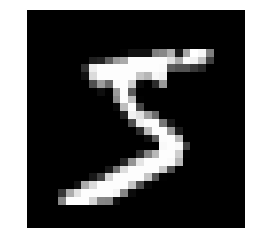

label: 5


In [18]:
# matplotlibを使ったグラフ描画結果がnotebook内に表示されるようにします．
%matplotlib inline
import matplotlib.pyplot as plt

# データの例示
x, t = train_img_0   # 0番目の (data, label) を取り出す
plt.imshow(x, cmap='gray')
plt.axis('off')
plt.show()
print('label:', t)

In [63]:
# Pytorchのトレーニングデータは画像とラベルのセットになっているので、画像だけを取り出す
train_data_imgs = [d[0] for d in train_data]

In [109]:
# ラベルごとに分けてみるかな
# どうしようかな？リストにしたらいいかもな、うん。お、できた。
# train_data_imgs_0 = [d[0] for d in train_data if d[1]==0 ]
# このラベルごとのデータをリストする
# [[0ラベルのimgs], [1ラベルのimgs], ....,[9ラベルのimgs]] のようなリストを作る

train_data_imgs_ordered = []
for i in range(10):
    # ここでラベルiのimageのリストを作る
    i_imgs = [d[0] for d in train_data if d[1]==i ]
    train_data_imgs_ordered.append(i_imgs)

In [146]:
# 今作ったデータの形状を確認する
# 各ラベルのデータ数は意外とばらつきあるんだな 5421(5) 〜 6742(1) 
[len(v) for v in train_data_imgs_ordered]

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [95]:
# 大量のpilのimageのリストを受け取って結合する
# 正方形にして出力する
# 1024なら32x32にして出力する 64なら8x8
def join_imgs(inimgs, outimg_name=None, img_num=1024):
    one_side_img_num = round(img_num**0.5 + 0.499999999)
    x = inimgs[0]   # 画像サイズを取得するために使う
    # 画像を結合するために最初にキャンバスをつくる
    canvas = Image.new(mode='L', size=(x.width*one_side_img_num, x.height*one_side_img_num), color=255)
    img_counter = 0
    for i in range(one_side_img_num):
        for j in range(one_side_img_num):
            x_cor  = j*x.width
            y_cor = i*x.height
            canvas.paste(inimgs[img_counter], (x_cor, y_cor))
            img_counter += 1
    return canvas

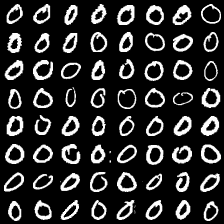

In [150]:
join_imgs(inimgs=train_data_imgs_ordered[0], outimg_name = "hoge",  img_num=64)

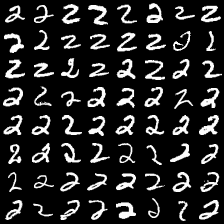

In [152]:
join_imgs(inimgs=train_data_imgs_ordered[2], outimg_name = "hoge",  img_num=64)

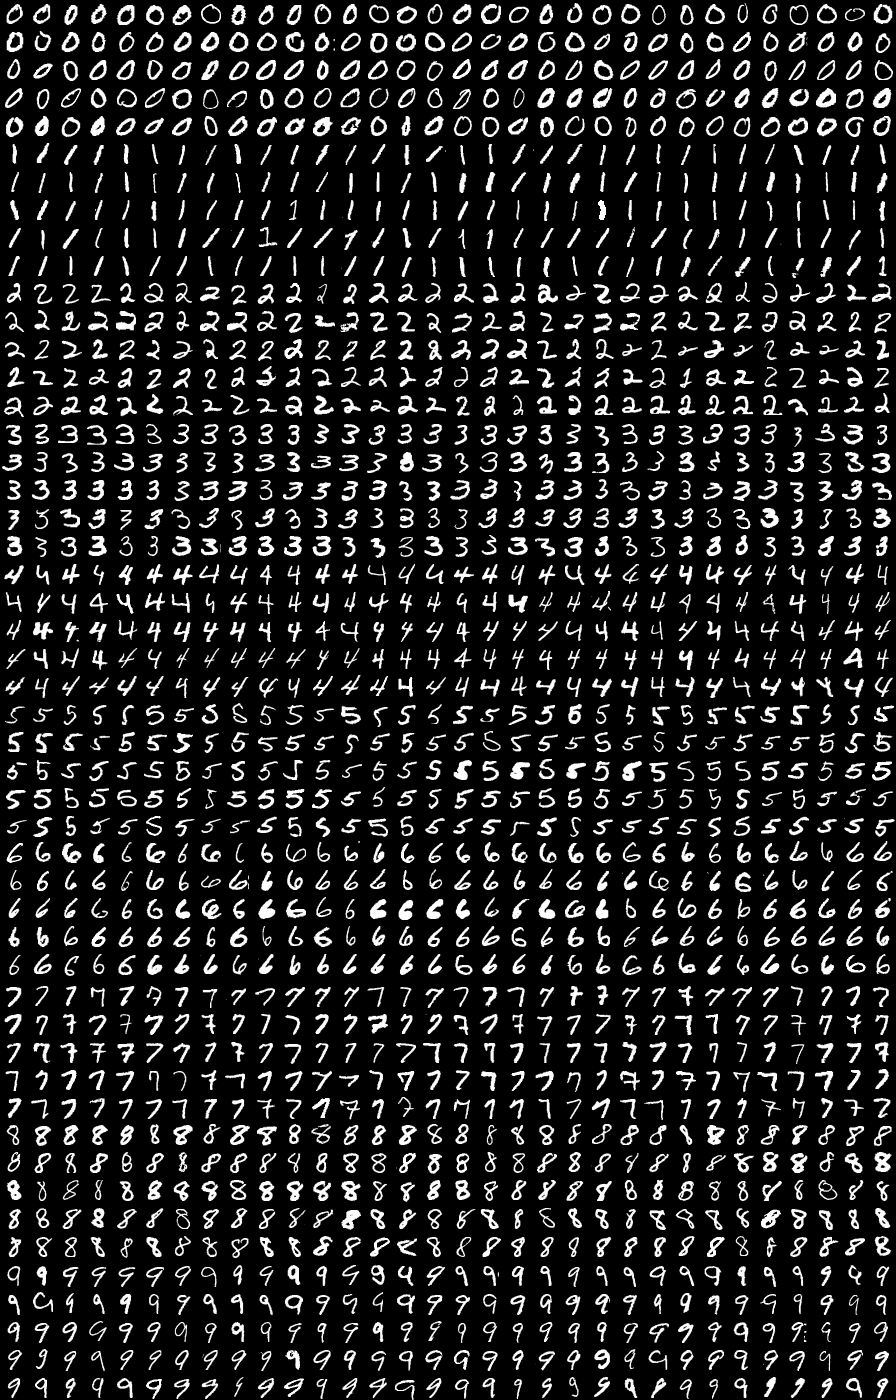

In [182]:
# 全部まとめて3行ずつくらいにして出してみる

col_num = 32  # 1行あたりの画像数
row_num = 5  # 一つの数当たりの行数
img_width = train_data_imgs_ordered[0][0].width
img_height = train_data_imgs_ordered[0][0].height

# 高さは一つの数の行数x10
canvas = Image.new(mode='L', size=(img_width*col_num, img_height*(row_num*10)), color=0)

# 数ごとのfor
number = 0
img_counter = 0
for number in range(10):
    for row_counter in range(row_num):
        for col_counter in range(col_num):
            x_cor = col_counter*img_width
            y_cor = (number*row_num+row_counter)*img_height
            canvas.paste(train_data_imgs_ordered[number][img_counter], (x_cor, y_cor))
            img_counter += 1
# 表示させる
canvas